In [1]:
from ConfigParser import ConfigParser
from train import Trainer
import argparse
import torch
import models
import datasets
from utils import * 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Configuration file 

In [2]:
from pathlib import Path
import json
from collections import OrderedDict


path = './config.json'
cfg_fname = Path(path)

with cfg_fname.open('rt') as handle:
    configDict = json.load(handle, object_hook=OrderedDict)

config = ConfigParser(config = configDict)

## Entraînement 

In [3]:
dataloaders = datasets.get_dataloader(img_path = "/Users/yanis/GehlerDataset/im",
                                          target_path = "/Users/yanis/GehlerDataset/colorMean.csv",
                                          fraction=0.7,
                                          batch_size=4)

In [4]:
model = config.init_obj('arch', models)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
criterion = torch.nn.MSELoss(reduction='mean')
metrics = {}
    
optimizer = config.init_obj('optimizer', torch.optim, model.parameters())

In [6]:
trainer = Trainer(model = model,
                      dataloaders = dataloaders,
                      optimizer = optimizer,
                      criterion = criterion,
                      metrics = metrics,
                      config = config)
    
trained_model = trainer.train()

device cpu
Epoch 1/1
----------


100%|██████████| 96/96 [04:03<00:00,  2.24s/it]

Train Loss: 0.0105



100%|██████████| 42/42 [01:09<00:00,  1.18s/it]


Test Loss: 0.0034
{'epoch': 1, 'Train_loss': 0.010479769669473171, 'Test_loss': 0.003419435117393732}
Saving checkpoint: saved/checkpoint-epoch1.pth ...
Training complete in 5m 15s


NameError: name 'MACBETH_COLOR_HEX' is not defined

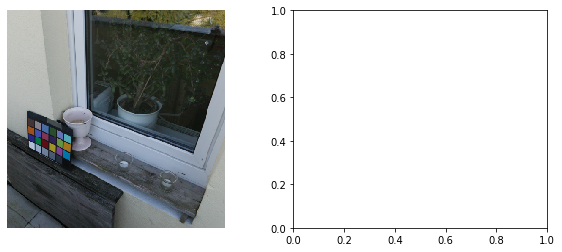

In [7]:
from utils import visualizePrediction

trained_model = trainer.model 
visualizePrediction(trained_model,dataloaders['Test'])

In [8]:
test_transform,test_dataset = datasets.get_eval_dataset(img_path = "/Users/yanis/GehlerDataset/im",
                                          target_path = "/Users/yanis/GehlerDataset/colorMean.csv")

In [ ]:
mean_rg = []
mean_dE = []
median_rg = []
medain_dE = []

for i in range(10):
    
    #Training
    model = config.init_obj('arch', models)
    criterion = torch.nn.MSELoss(reduction='mean')
    metrics = {}
    optimizer = config.init_obj('optimizer', torch.optim, model.parameters())
    trainer = Trainer(model = model,
                      dataloaders = dataloaders,
                      optimizer = optimizer,
                      criterion = criterion,
                      metrics = metrics,
                      config = config)
    trained_model = trainer.train()
    
    #Evaluation 
    dRG,dE = evaluate(model= trained_model,
                      test_dataset = test_dataset,
                      transform = test_transform)
    
    mean_rg.append(np.mean(dRG))
    mean_dE.append(np.mean(dE))
    median_rg.append(np.quantile(dRG,0.5))
    medain_dE.append(np.quantile(dE,0.5))